In [1]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
read = pd.read_csv("data/READCopyProtein50.csv")
coad = pd.read_csv("data/COADCopyProtein50.csv")
gse = pd.read_csv("data/GSE62254CopyConvertedProtein.csv")
all_data = pd.concat((read, coad, gse))

In [3]:
read.drop("Unnamed: 0", axis=1, inplace=True)
coad.drop("Unnamed: 0", axis=1, inplace=True)
gse.drop("Unnamed: 0", axis=1, inplace=True)
all_data.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
for df in [read, coad, gse, all_data]:
    print(df.shape)

(159, 16299)
(474, 16294)
(300, 15043)
(933, 17195)


In [5]:
for df in [read, coad, gse, all_data]:
    df.dropna(axis=1, inplace=True)
    df.reset_index(drop=True, inplace=True)

In [6]:
for df in [read, coad, gse, all_data]:
    print(df.shape)

(159, 16299)
(474, 16294)
(300, 15043)
(933, 14138)


In [7]:
from sklearn import decomposition
from sklearn import manifold

In [8]:
def plot_embedding(data, label, embedder_type="tsne"):
    data_X = data.drop(["COVAR_M", "COVAR_N_status"], axis=1)
    embedder = None
    if embedder_type == "pca":
        embedder = decomposition.PCA(n_components=2)
    else:
        embedder = manifold.TSNE(n_components=2)
    data_emb = embedder.fit_transform(data_X)
    x_0 = data_emb[data[label] == 0][:, 0]
    y_0 = data_emb[data[label] == 0][:, 1]
    x_1 = data_emb[data[label] == 1][:, 0]
    y_1 = data_emb[data[label] == 1][:, 1]
    
    plt.figure()
    plt.style.use("seaborn")
    plt.scatter(x_0, y_0, c="red", label="0")
    plt.scatter(x_1, y_1, c="blue", label="1")
    plt.title(embedder_type.upper() + " " + label)
    plt.legend()

/Users/ZanderL/opt/anaconda3/envs/cs229project/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ZanderL/opt/anaconda3/envs/cs229project/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


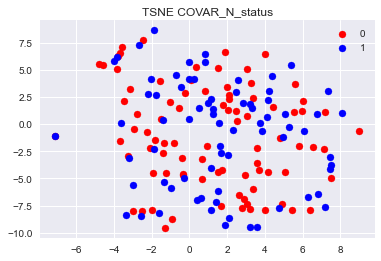

In [9]:
plot_embedding(read, "COVAR_N_status")

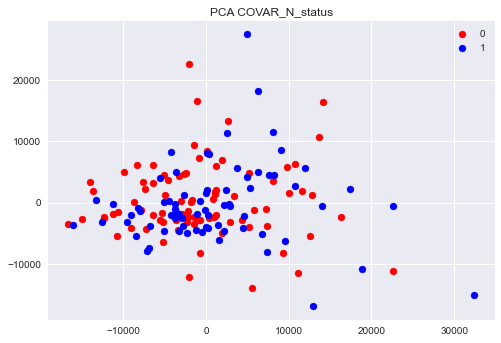

In [10]:
plot_embedding(read, "COVAR_N_status", "pca")

In [ ]:
plot_embedding(all_data, "COVAR_N_status", "pca")